# Inversion Climatology
Inversions offer significant challenges in agriculture, specifically with frost managment and pesticide application. 

In [23]:
# read the pkls
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# read the pkls
all_temp = pd.read_pickle(r'..\Data\ALL_5Min_TEMPS.pkl')
all_TKE = pd.read_pickle(r'..\Data\ALL_5Min_TKE.pkl')
all_wind = pd.read_pickle(r'..\Data\ALL_5Min_WIND.pkl')
print('All five minute data loaded')

invdf=pd.read_pickle(r"..\Data\inversiontimeswithwinds.pkl")
SR=pd.read_pickle(r"..\Data\SRAll.pkl")
print("inversion data loaded")



All five minute data loaded
inversion data loaded


Set up a few common things for all data analysis. 

In [ ]:
towers = ['init', 'rel', 'uconv', 'lconv']
harvest_colors = {'pre-harvest': 'blue', 
    'post-harvest': 'red', 
    'harvest': 'green'}
inversion_markers = {
    'micro': 'o',   # circle
    'short': 's',   # square
    'medium': '^',  # triangle up
    'long': 'D',    # diamond
    'extreme': 'X'  # x
    # add others if needed
}

# Create dictionaries to hold information about harvest conditions and inversion types
harvest_conditions = {}
harvest_conditions['pre_harvest'] = {'color': 'blue', 'label': 'Pre-Harvest'}
harvest_conditions['post_harvest'] = {'color': 'red', 'label': 'Post-Harvest'}
harvest_conditions['harvest'] = {'color': 'green', 'label': 'Harvest'}

inversion_types = {}
inversion_types['micro'] = {'marker': 'o', 'label': 'Micro', 'description': '<5 min'}
inversion_types['short'] = {'marker': 's', 'label': 'Short', 'description': '5 min - 1 hr'}
inversion_types['medium'] = {'marker': '^', 'label': 'Medium', 'description': '1 hr - 3 hr'}
inversion_types['long'] = {'marker': 'D', 'label': 'Long', 'description': '3 hr - 11.5 hr'}
inversion_types['extreme'] = {'marker': 'X', 'label': 'Extreme', 'description': '> 11.5 hr'}

cardinal_directions = {
    0: 'N',
    45: 'NE',
    90: 'E',
    135: 'SE',
    180: 'S',
    225: 'SW',
    270: 'W',
    315: 'NW'
}


# Example usage:
# plt.scatter(x, y, color=harvest_conditions['pre_harvest']['color'], marker=inversion_types['micro']['marker'])

In [29]:
# Lets look at the inversion types
inv_order = ['micro', 'short', 'medium', 'long', 'extreme']
invdf['Inv Class'] = pd.Categorical(invdf['Inv Class'], categories=inv_order, ordered=True)

print(invdf['Inv Class'].value_counts(sort=False))

Inv Class
micro      417
short      586
medium     231
long       210
extreme    286
Name: count, dtype: int64


In [7]:
# wind shear hexbinned by vertical temp difference

# do just for initiation tower to start
# Find all variables with 'init' or 'Init' in their names
init_temp = all_temp.filter(like='init', axis=1)
init_wind = all_wind.filter(like='init', axis=1)
init_TKE = all_TKE.filter(like='init', axis=1)
# merge
init_all = pd.concat([init_temp, init_wind, init_TKE], axis=1)
print('initiation tower data extracted')

initiation tower data extracted


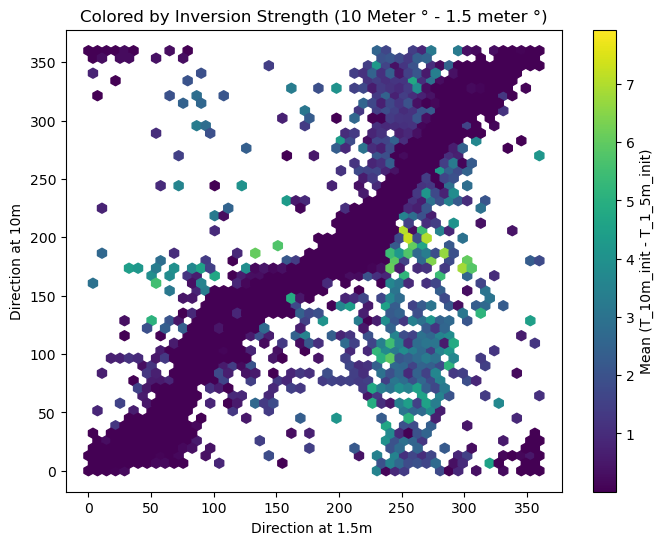

In [101]:
vmax = np.nanmax(np.abs(init_all['T_10m_init'] - init_all['T_1_5m_init']))
vmin = np.nanmin(np.abs(init_all['T_10m_init'] - init_all['T_1_5m_init']))
plt.figure(figsize=(8, 6))
hb = plt.hexbin(
    x=init_all['dir_1_5m_init'],
    y=init_all['dir_10m_init'],
    C=init_all['T_10m_init'] - init_all['T_1_5m_init'],
    gridsize=50,
    cmap='viridis', 
    reduce_C_function=np.min,
    mincnt=1,
    vmin=vmin,
    vmax=vmax
)
plt.colorbar(hb, label='Mean (T_10m_init - T_1_5m_init)')
plt.xlabel('Direction at 1.5m ')
plt.ylabel('Direction at 10m')
plt.title('Colored by Inversion Strength (10 Meter ° - 1.5 meter °)')
plt.show()

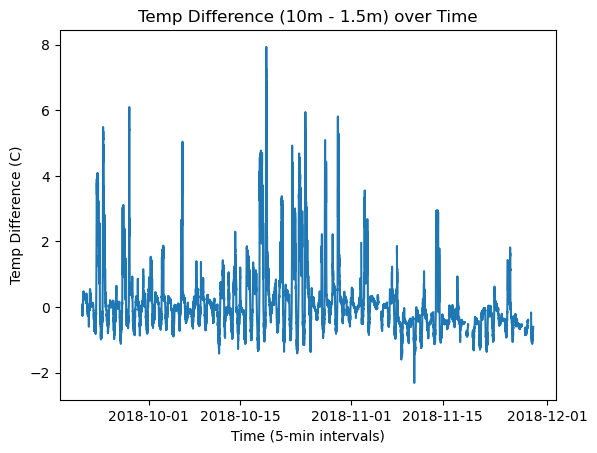

In [17]:
plt.plot(init_all['T_10m_init'] - init_all['T_1_5m_init'])
plt.title('Temp Difference (10m - 1.5m) over Time')
plt.ylabel('Temp Difference (C)')
plt.xlabel('Time (5-min intervals)')
plt.show()